In [22]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/All_Friends_data.csv"
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,Speaker,Text,Episode,Scene
0,monica,"oh, the way you crushed mike at ping pong was...",1001,"[scene barbados, monica and chandler's room. t..."
1,chandler,"you know, i'd love to, but i'm a little tired.",1001,"[scene barbados, monica and chandler's room. t..."
2,monica,i'll put a pillowcase over my head.,1001,"[scene barbados, monica and chandler's room. t..."
3,chandler,you're on!,1001,"[scene barbados, monica and chandler's room. t..."
4,phoebe,hey!,1001,"[scene barbados, monica and chandler's room. t..."


In [6]:
#joey = joe, rachel = rach, monica = mon, phoebe = phoebs = phoeb
mainch = ["joey","rachel","ross","chandler","monica","phoebe"]

In [7]:
# function for clearing lines
def cleanLines(line):
    #Exclude links
    line = re.sub(r'\([^)]*\)','',line)
    #Remove everything besides letters
    line = re.sub("([^a-z \t])|(\w+:\/\/\S+)", "", line)
    #Create a string for tweet
    line = [''.join(s for s in line)]
    return(line) 

In [8]:
#Create list for what characters says. allsays[0] is what joey says, allsays[5] is phoebe
allsays = list()
for character in mainch:
    says = df.Text[[character in i for i in df.Speaker.str.split("\b")]].reset_index(drop=True)
    sayscont = list()
    for i in range(len(says)):
        sayscont.extend(cleanLines(says[i]))
    allsays.append(sayscont)

In [9]:
#Add words to stopwords
stopWords = nltk.corpus.stopwords.words('english')
newStopWords = ["like","get","yeah","know","gonna","hey","uh","oh","well","okay","im","dont","youre","thats","got"]
stopWords.extend(newStopWords)


In [10]:
#create list of real words
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

In [11]:
#Create list for all words
allwords = list()

#Create list for character
joeysays = []
for i in range(len(allsays[0])):
    words = [w for w in allsays[0][i].split() if w in english_vocab and w not in stopWords]
    joeysays.extend(words)
allwords.extend(joeysays)

In [12]:
n = 1
rachelsays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    rachelsays.extend(words)
allwords.extend(rachelsays)

n+=1
rosssays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    rosssays.extend(words)
allwords.extend(rosssays)
    
n+=1
chandlersays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    chandlersays.extend(words)
allwords.extend(chandlersays)

n+=1
monicasays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    monicasays.extend(words)
allwords.extend(monicasays)

n+=1
phoebesays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w in english_vocab and w not in stopWords]
    phoebesays.extend(words)
allwords.extend(phoebesays)


In [13]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/Data_Set_S1.csv"
s1 = pd.read_csv(url, sep='\t')
s1.head(5)

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


In [14]:
# Sentiment dictonary:
sentiments = dict(zip(s1.word,s1.happiness_average))

In [16]:
# Function that calculates sentiment given a list of tokens
def sentiment_func(token_list):
    res = []
    for word in token_list:
        if word in s1.word.values:
            res.append(sentiments[word])
        
    return sum(res)/len(res) if len(res) else 0

In [17]:
#Sentiment for Joey
joeysent = []
for line in joeysays:
    joeysent.append(sentiment_func(line))

In [18]:
#Clear out 0 instances
joeySent = [i for i in joeysent if i > 0]

In [19]:
#Sentiment for Rachel
racsent = []
for line in rachelsays:
    racsent.append(sentiment_func(line))

#Sentiment for Ross
rosssent = []
for line in rosssays:
    rosssent.append(sentiment_func(line))
    
#Sentiment for Chandler
chasent = []
for line in chandlersays:
    chasent.append(sentiment_func(line))
    
#Sentiment for Monica
monsent = []
for line in monicasays:
    monsent.append(sentiment_func(line))
    
#Sentiment for Phoebe
phosent = []
for line in phoebesays:
    phosent.append(sentiment_func(line))


In [20]:
#Clear out 0 instances
racSent = [i for i in racsent if i > 0]
rossSent = [i for i in rosssent if i > 0]
chaSent = [i for i in chasent if i > 0]
monSent = [i for i in monsent if i > 0]
phoSent = [i for i in phosent if i > 0]

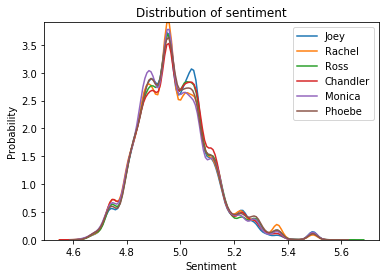

In [23]:
# Distribution plot:
sns.kdeplot(joeySent, label="Joey")
sns.kdeplot(racSent, label="Rachel")
sns.kdeplot(rossSent, label="Ross")
sns.kdeplot(chaSent, label="Chandler")
sns.kdeplot(monSent, label="Monica")
sns.kdeplot(phoSent, label="Phoebe")
plt.legend();
plt.xlabel('Sentiment');
plt.ylabel('Probability');
plt.title('Distribution of sentiment');
plt.show()